# Introduction to Machine Learning
## Lecture 1 - Regression
### Notebook 3: Complete Regression Analysis on Student Grade Prediction
Prapared by: Said Bolluk

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

Use the following link to access detailed information about the attributes of the dataset.
https://www.kaggle.com/datasets/dipam7/student-grade-prediction

In [2]:
data = pd.read_csv("../datasets/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [31]:
data.shape

(395, 12)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Remove some categorical columns that are intuitively considered redundant to reduce the cardinality in data and improve the regression. Note that, discarding these columns will cause information loss. However, considering the small size of the dataset, this action should be taken. Plus, the features **G1 and G2** will also be discarded since the feature **G3**, the final grade, will be our only target variable.

In [4]:
redundants = [
    "school", "address", "famsize", "Mjob", "Fjob", "reason", 
    "guardian", "schoolsup", "famsup", "activities", "nursery", 
    "Dalc", "Walc",
]

Create a copy of the dataset before proceeding

In [5]:
student_data = data.copy()

In [6]:
data.shape

(395, 33)

In [7]:
data = data.drop(columns=redundants)

In [8]:
data.shape

(395, 20)

In [9]:
# Assign the feature set and the target variable
target_name = "G3"
target = data[target_name]

data = data.drop(columns=[target_name])

In [10]:
# Separate the categorical and numerical columns

from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [11]:
print("Numerical columns: ", numerical_columns)
print("Categorical columns: ,", categorical_columns)

Numerical columns:  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2']
Categorical columns: , ['sex', 'Pstatus', 'paid', 'higher', 'internet', 'romantic']


## Feature Selection

1) Categorical Features

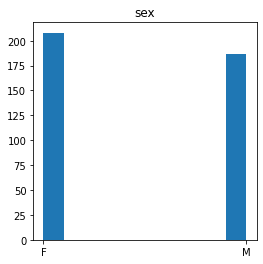

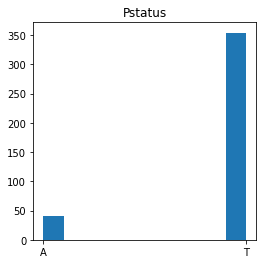

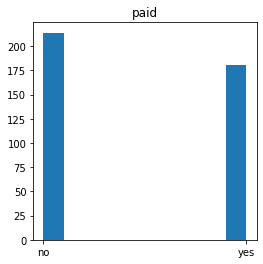

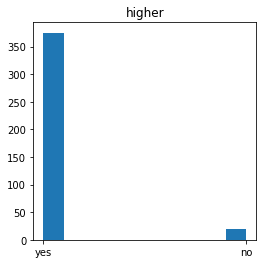

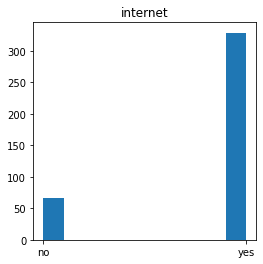

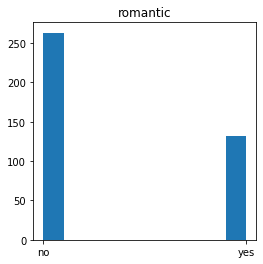

In [12]:
# Observe the distribution of the categorical features
for col in categorical_columns:
    plt.figure(figsize=(4, 4))
    plt.hist(data[col])
    plt.title(col)
    plt.show()

From the histogram plots above, wee see that the features **Pstatus, higher, and internet** are highly imbalanced. To further improve the regression efficiency, these columns will also be removed although this action might cause information loss. 

In [13]:
cat_redundants = [
    "Pstatus",
    "higher",
    "internet",
]

cat_determinants = [
    "sex", 
    "paid", 
    "romantic",
]

2) Numerical Features

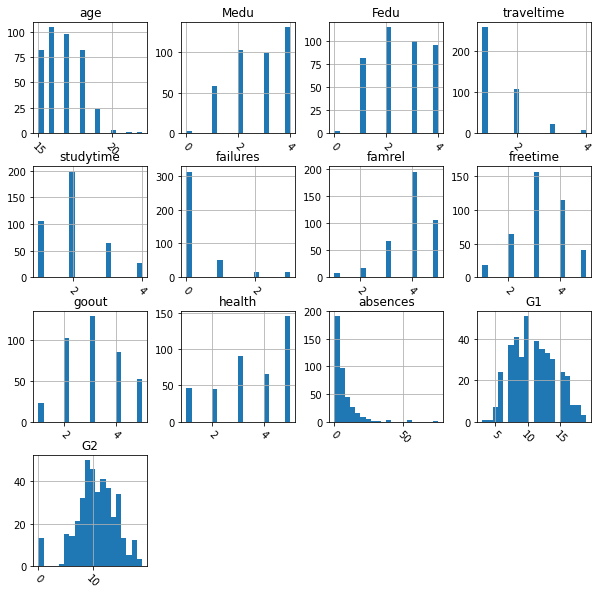

In [14]:
# Histogram view for the numerical features
data.hist(bins=20, figsize=(10, 10), xrot=-45)
plt.show()

Distribution of the numerical features seems fine. We can proceed with all of them in regression.

Analyze the correlation between the numerical features and the target to decide the essential varibles used in regression.

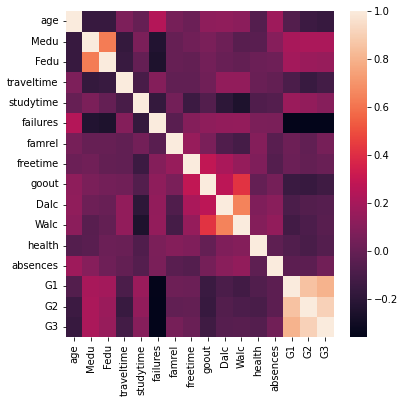

In [15]:
# Visualize the correlation
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(student_data.corr(), ax=ax)
plt.show()

In [16]:
# Analyze the absolute correlation values
corr = student_data.corr()
print("Correlation with the target variable")
corr["G3"].abs().sort_values(ascending=False)[1:]

Correlation with the target variable


G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64

Here, we can define a threshold for the correlation. Our assumption is that the features having below the 0.10 absolute correlation (with 0.01 std.) cannot represent a student's grade. Therefore, we will continue with the following features as the determinants of the final grade: **G2, G1, failures, Medu, age, Fedu, goout, traveltime, studytime**.

In [17]:
num_determinants = [
    "G2", "G1", "failures", "Medu", "age", 
    "Fedu", "goout", "traveltime", "studytime", 
]

num_redundants = [
    "health", "Dalc", "Walc", 
    "famrel", "absences", "freetime",
]

In [18]:
# Combine the determinant features from categorical and numerical sets
determinants = cat_determinants + num_determinants
print(determinants)

['sex', 'paid', 'romantic', 'G2', 'G1', 'failures', 'Medu', 'age', 'Fedu', 'goout', 'traveltime', 'studytime']


In [19]:
# Include only the determinants in the final data
data = data[determinants]
data.head()

,sex,paid,romantic,G2,G1,failures,Medu,age,Fedu,goout,traveltime,studytime
0,F,no,no,6,5,0,4,18,4,4,2,2
1,F,no,no,5,5,0,1,17,1,3,1,2
2,F,yes,no,8,7,3,1,15,1,2,1,2
3,F,yes,yes,14,15,0,4,15,2,2,1,3
4,F,yes,no,10,6,0,3,16,3,2,1,2


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   paid        395 non-null    object
 2   romantic    395 non-null    object
 3   G2          395 non-null    int64 
 4   G1          395 non-null    int64 
 5   failures    395 non-null    int64 
 6   Medu        395 non-null    int64 
 7   age         395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   goout       395 non-null    int64 
 10  traveltime  395 non-null    int64 
 11  studytime   395 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 37.2+ KB


In [32]:
data.isnull().sum()

sex           0
paid          0
romantic      0
G2            0
G1            0
failures      0
Medu          0
age           0
Fedu          0
goout         0
traveltime    0
studytime     0
dtype: int64

## Preprocessing
Here, we will apply encoding to the categorical features to transform them into one-hot numeric arrays, and scale the numerical features using Standard Scaler. This way, the categorical features can be introduced in the model as numeric values without loosing information when there is no hierarchy among the categories. Similarly, scaling procedure will help reduce the variability in the range of different numerical features. Let us say, for example, a feature is in between 1-100 where another one is in between 1e3-1e5. This might induce confusion to the training process. Therefore, scaling the numerical features might improve the results in most machine learning models.

### Encoding categorical features using OneHotEncoder
Encoding the categorical variables help preventing model to assess them hierarchically. Suppose that the gender values are encoded as **one and zero for girls and boys**, respectively. If this values are introduced in to model as single numerical values, the model will consider a hierarchy as one is bigger than zero. Therefore, we create additional columns for each category in the categorical features and put ones to the relavant category and zeros to the others.

In [33]:
data["sex"].tail(10)

385    F
386    F
387    F
388    F
389    F
390    M
391    M
392    M
393    M
394    M
Name: sex, dtype: object

In [22]:
# Apply one-hot-encoding
pd.get_dummies(data["sex"]).tail(10)

,F,M
385,1,0
386,1,0
387,1,0
388,1,0
389,1,0
390,0,1
391,0,1
392,0,1
393,0,1
394,0,1


In [23]:
data.shape

(395, 12)

In [24]:
X = pd.get_dummies(data)

In [25]:
X.shape

(395, 15)

You can see that number of features is increased by three as three additional columns are added for each categorical feature.

### Transforming numerical features using StandardScaler
First, split data into training and test sets.

In [26]:
X = X.values
y = target.values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 296
Test size: 99


In [27]:
# Scale the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# REGRESSION

In [28]:
# Train the model
from sklearn.linear_model import LinearRegression

# Define a model
regressor = LinearRegression()
# Train the model over training set
regressor.fit(X_train, y_train)

# Validate the model over test set
predictions = regressor.predict(X_test)

In [29]:
# Compare some results

print("ACTUAL VALUES:\n", y_test[:50])
print("PREDICTED VALUES:\n", np.round(predictions[:50]))

ACTUAL VALUES:
 [10 12  5 10  9 13 18  6  0 14 15  7 15 10 14  8  8 11 15  0 14 16 16  6
  0 19 11 12 17 10  8 10 15 13  8  5  0 15 14  8  5 11 14  9 15 10 11 13
 13 16]
PREDICTED VALUES:
 [ 7. 12.  3.  9.  8. 13. 19.  7.  8. 13. 15.  6. 14. 12. 15.  8.  6. 11.
 15.  9. 14. 17. 15.  5.  8. 20. 10.  9. 17. 12.  8.  8. 15. 13.  6.  4.
 -2. 15. 12.  8.  5. 11. 14.  8. 16. 10. 12. 13. 13. 16.]


## Model Evaluation

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

mse = np.round(mean_squared_error(y_test, predictions), 3)
print("MSE:", mse)

r2 = np.round(r2_score(y_test, predictions), 3)
print("R2:", r2)

MSE: 4.443
R2: 0.807


Results shows that more than 80% of the variance in the target feature is explained by the regressor according to the R2 value. This suggests that the model has a high generalization capacity. Moreover, less mean squared error (MSE) indicates that the model is confident in predicting the students' grades with the included features.

# END